## Pedicticting Credit Card Fraud

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Analysis:
    # - The dataset contains features generated from credit card transactions, along with the 'Class' column indicating whether a transaction is fraudulent (1) or not (0).
    # - The features include transaction amount, time, and other anonymized features.
    # - The 'Time' column represents the seconds elapsed between each transaction and the first transaction in the dataset. It might not be relevant for fraud detection.


In [3]:
# Drop the 'Time' column as it may not contribute significantly to the fraud detection process
data.drop(['Time'], axis=1, inplace=True)

In [4]:
# Scale the 'Amount' column to have zero mean and unit variance
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

 
Scaling the 'Amount' column ensures that it has a similar range as other features, preventing it from dominating the model training process due to its larger values.

StandardScaler scales the data to have a mean of 0 and a standard deviation of 1, making it suitable for many machine learning algorithms.

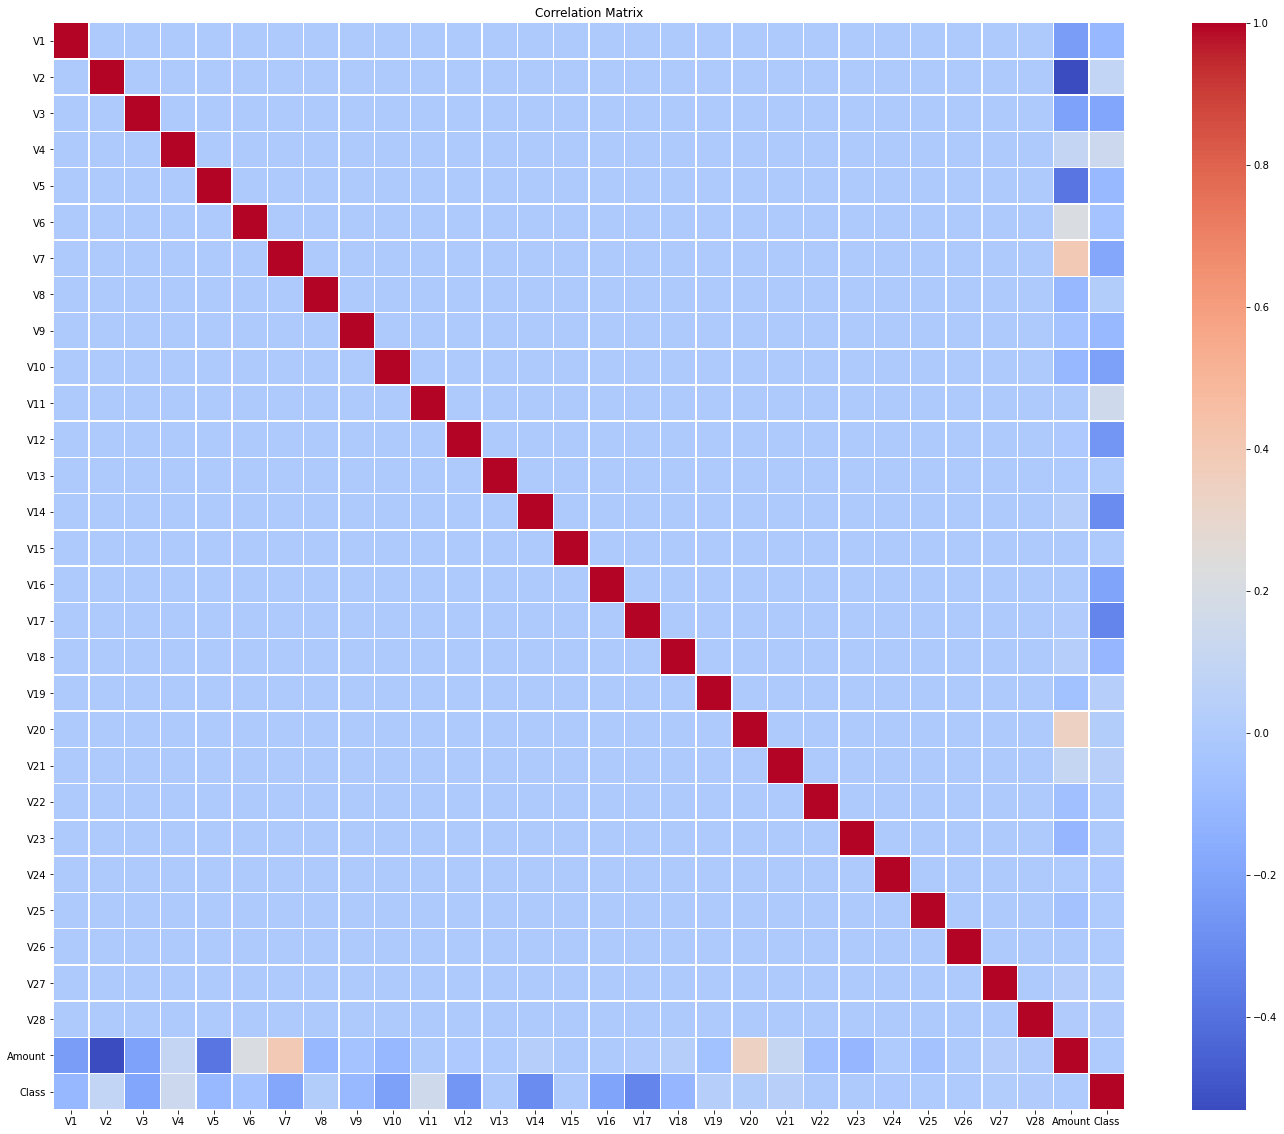

In [38]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

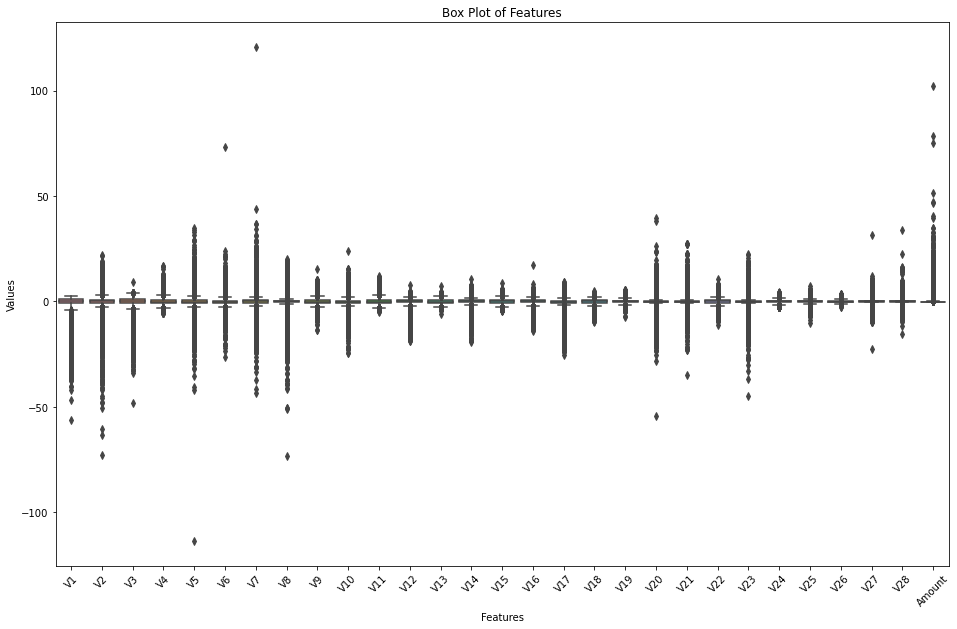

In [35]:
# Drop the 'Class' column if it's the target variable
df_features = data.drop(columns=['Class'])

# Plotting box plots for each feature
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_features)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [6]:
# Split data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analysis:
Three different classification models (Logistic Regression, Random Forest, Gradient Boosting) are trained on the training data.

Each model learns the patterns in the data to distinguish between fraudulent and non-fraudulent transactions.

In [10]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Train random forest model with parallelization
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1)

# Analysis:
Two different classification models (Logistic Regression, Random Forest) are trained on the training data.

Each model learns the patterns in the data to distinguish between fraudulent and non-fraudulent transactions.

In [16]:
# Evaluate models
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [18]:
# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

In [19]:
lr_precision = precision_score(y_test, lr_preds)
rf_precision = precision_score(y_test, rf_preds)

In [20]:
lr_recall = recall_score(y_test, lr_preds)
rf_recall = recall_score(y_test, rf_preds)

In [21]:
lr_f1_score = f1_score(y_test, lr_preds)
rf_f1_score = f1_score(y_test, rf_preds)

# Analysis:

Evaluation metrics such as accuracy, precision, recall, and F1-score are calculated to assess the performance of each model.

Accuracy measures the proportion of correct predictions out of all predictions made by the model.

Precision measures the proportion of true positive predictions out of all positive predictions made by the model.

Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.

F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.


In [22]:
# Define model names
models = ['Logistic Regression', 'Random Forest']

In [27]:
# Define metric scores for each model
accuracies = [lr_accuracy, rf_accuracy]
precisions = [lr_precision, rf_precision]
recalls = [lr_recall, rf_recall]
f1_scores = [lr_f1_score, rf_f1_score]
print(accuracies)
print(precisions)
print(recalls)
print(f1_scores)

[0.9991222218320986, 0.9996313331694814]
[0.8636363636363636, 0.9873417721518988]
[0.5816326530612245, 0.7959183673469388]
[0.6951219512195121, 0.8813559322033897]


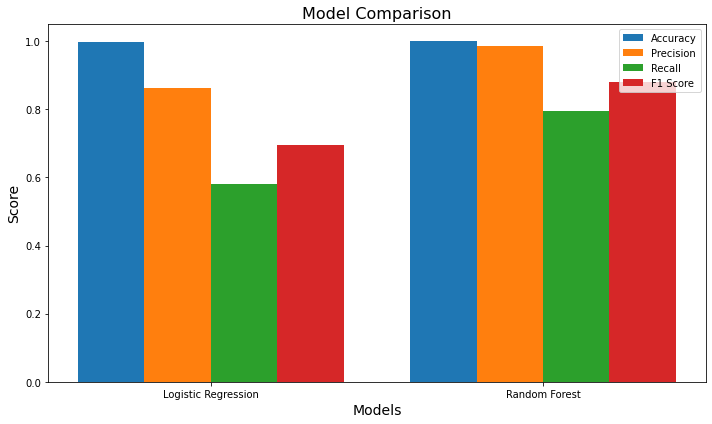

In [25]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.2

# Define index for bar positions
index = range(len(models))

# Plot bars for each metric
plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar([idx + bar_width for idx in index], precisions, bar_width, label='Precision')
plt.bar([idx + 2 * bar_width for idx in index], recalls, bar_width, label='Recall')
plt.bar([idx + 3 * bar_width for idx in index], f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Comparison', fontsize=16)
plt.xticks([idx + 1.5 * bar_width for idx in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

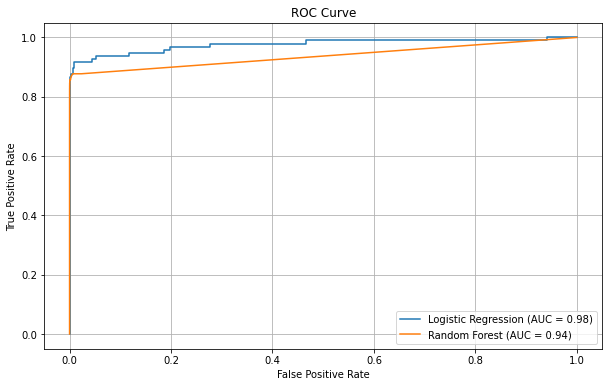

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Predict probabilities for test data
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

**Accuracy:**

Both models exhibit extremely high accuracy, indicating that they correctly classify the majority of instances. However, accuracy alone may not be the most reliable metric, especially in the case of imbalanced datasets.
**Precision:**

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. The RF model demonstrates higher precision compared to the LR model, indicating that it has a lower rate of false positive predictions.

**Recall:**

Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances in the dataset. The RF model achieves a higher recall than the LR model, indicating that it captures a higher percentage of true positive cases.

**F1 Score:**

The F1 score, which is the harmonic mean of precision and recall, provides a balance between these two metrics. The RF model outperforms the LR model in terms of F1 score, indicating better overall performance in terms of both precision and recall.

**Recommendations:**

**Consider Imbalanced Classes:**
Since the dataset might be imbalanced, accuracy alone may not provide a complete picture of model performance. It's crucial to consider metrics like precision, recall, and F1 score, especially in scenarios where one class dominates the other.

**Select Model Based on Business Requirements:**
If minimizing false positives (i.e., maximizing precision) is critical, the RF model seems to perform better in this aspect.

If capturing a higher percentage of true positive cases (i.e., maximizing recall) is more important, the RF model also outperforms the LR model in this regard.

**Further Analysis:**
It's essential to understand the consequences of false positives and false negatives in the context of the problem domain. Depending on the application, one metric (precision or recall) might be prioritized over the other.

**Model Complexity:**
While the RF model shows superior performance in terms of precision, recall, and F1 score, it's essential to consider the complexity of the model. RF models tend to be more complex than LR models and may require more computational resources.

**Validation and Testing:**
These models should be further evaluated on a separate validation or testing dataset to ensure their generalization performance. Overfitting can occur, especially when models are trained and evaluated on the same dataset.


In summary, the random forest model appears to offer better performance based on the provided metric scores. However, the final model selection should consider both the business requirements and the trade-offs between precision and recall. Additionally, further validation and testing are necessary to confirm the models' robustness and generalization capabilities